<a href="https://colab.research.google.com/github/kagitalamoazima/Cuvette/blob/Moazima/Python_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #This ignore any warnings that import statements has raised while importing packages.

In [34]:
df = pd.read_csv("/content/StudentsPerformance.csv")
df.head() #The csv while is stored in this variable df.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [35]:
df.describe() #Statistical description to find is there any sweked present in the dataset.

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [36]:
df.info()  #No null values and 5 columns are categorical and 3 columns are integer values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [37]:
avg_score = df[['math score',"reading score","writing score"]].mean(axis=1) # This is used to calculate the avg of every student of all three subjects.
print(avg_score)

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64


In [38]:
df["avg_score"] = pd.DataFrame(avg_score)


In [39]:
df.head() #Check for the new column has been added to data set or not This avg_score is our Y-label or target.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [40]:
df["Result"] = df["avg_score"].apply(lambda x: "pass" if x>=50 else "fail")

**Data Cleaning steps:**

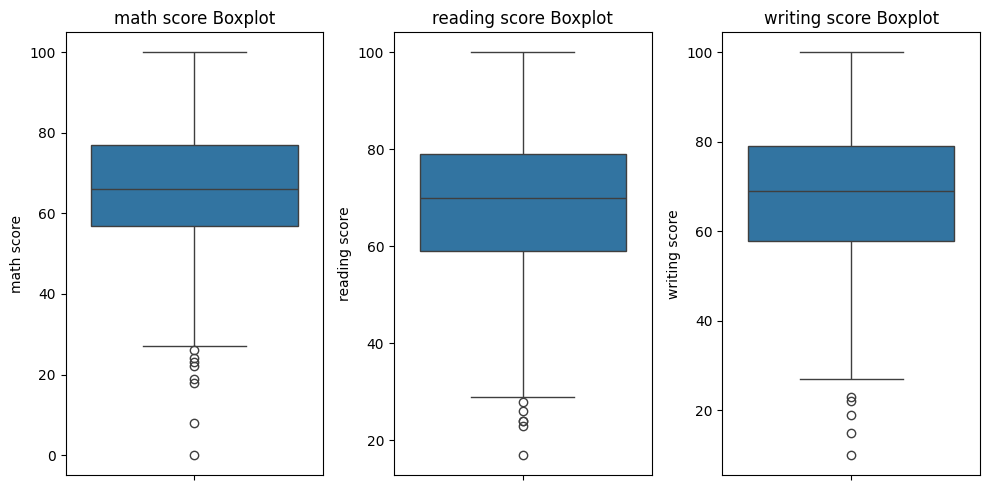

In [41]:
#check for outliers:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['math score', 'reading score', 'writing score']

plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()


In [42]:
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return DataFrame with outlier rows removed
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


In [43]:
numerical_cols = ['math score', 'reading score', 'writing score']

for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

df.reset_index(drop=True, inplace=True)

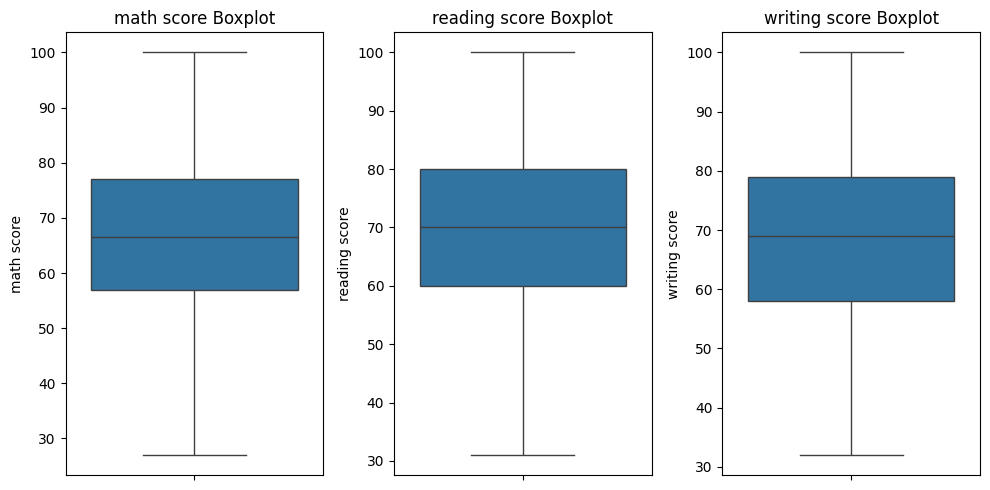

In [44]:
#check for outliers:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['math score', 'reading score', 'writing score']

plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()
#By using iqr method we removed outliers.

**Split feature and Label columns for training and testing:**

In [45]:
X = df.drop(["avg_score","Result"],axis=1)
y = df["Result"]

In [46]:
y.value_counts()

,count
Result,
pass,897
fail,89


In [47]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [48]:
cat = X.select_dtypes(include="object").columns
num = X.select_dtypes(include=['int64', 'float64']).columns

**Data Visualization Steps:**

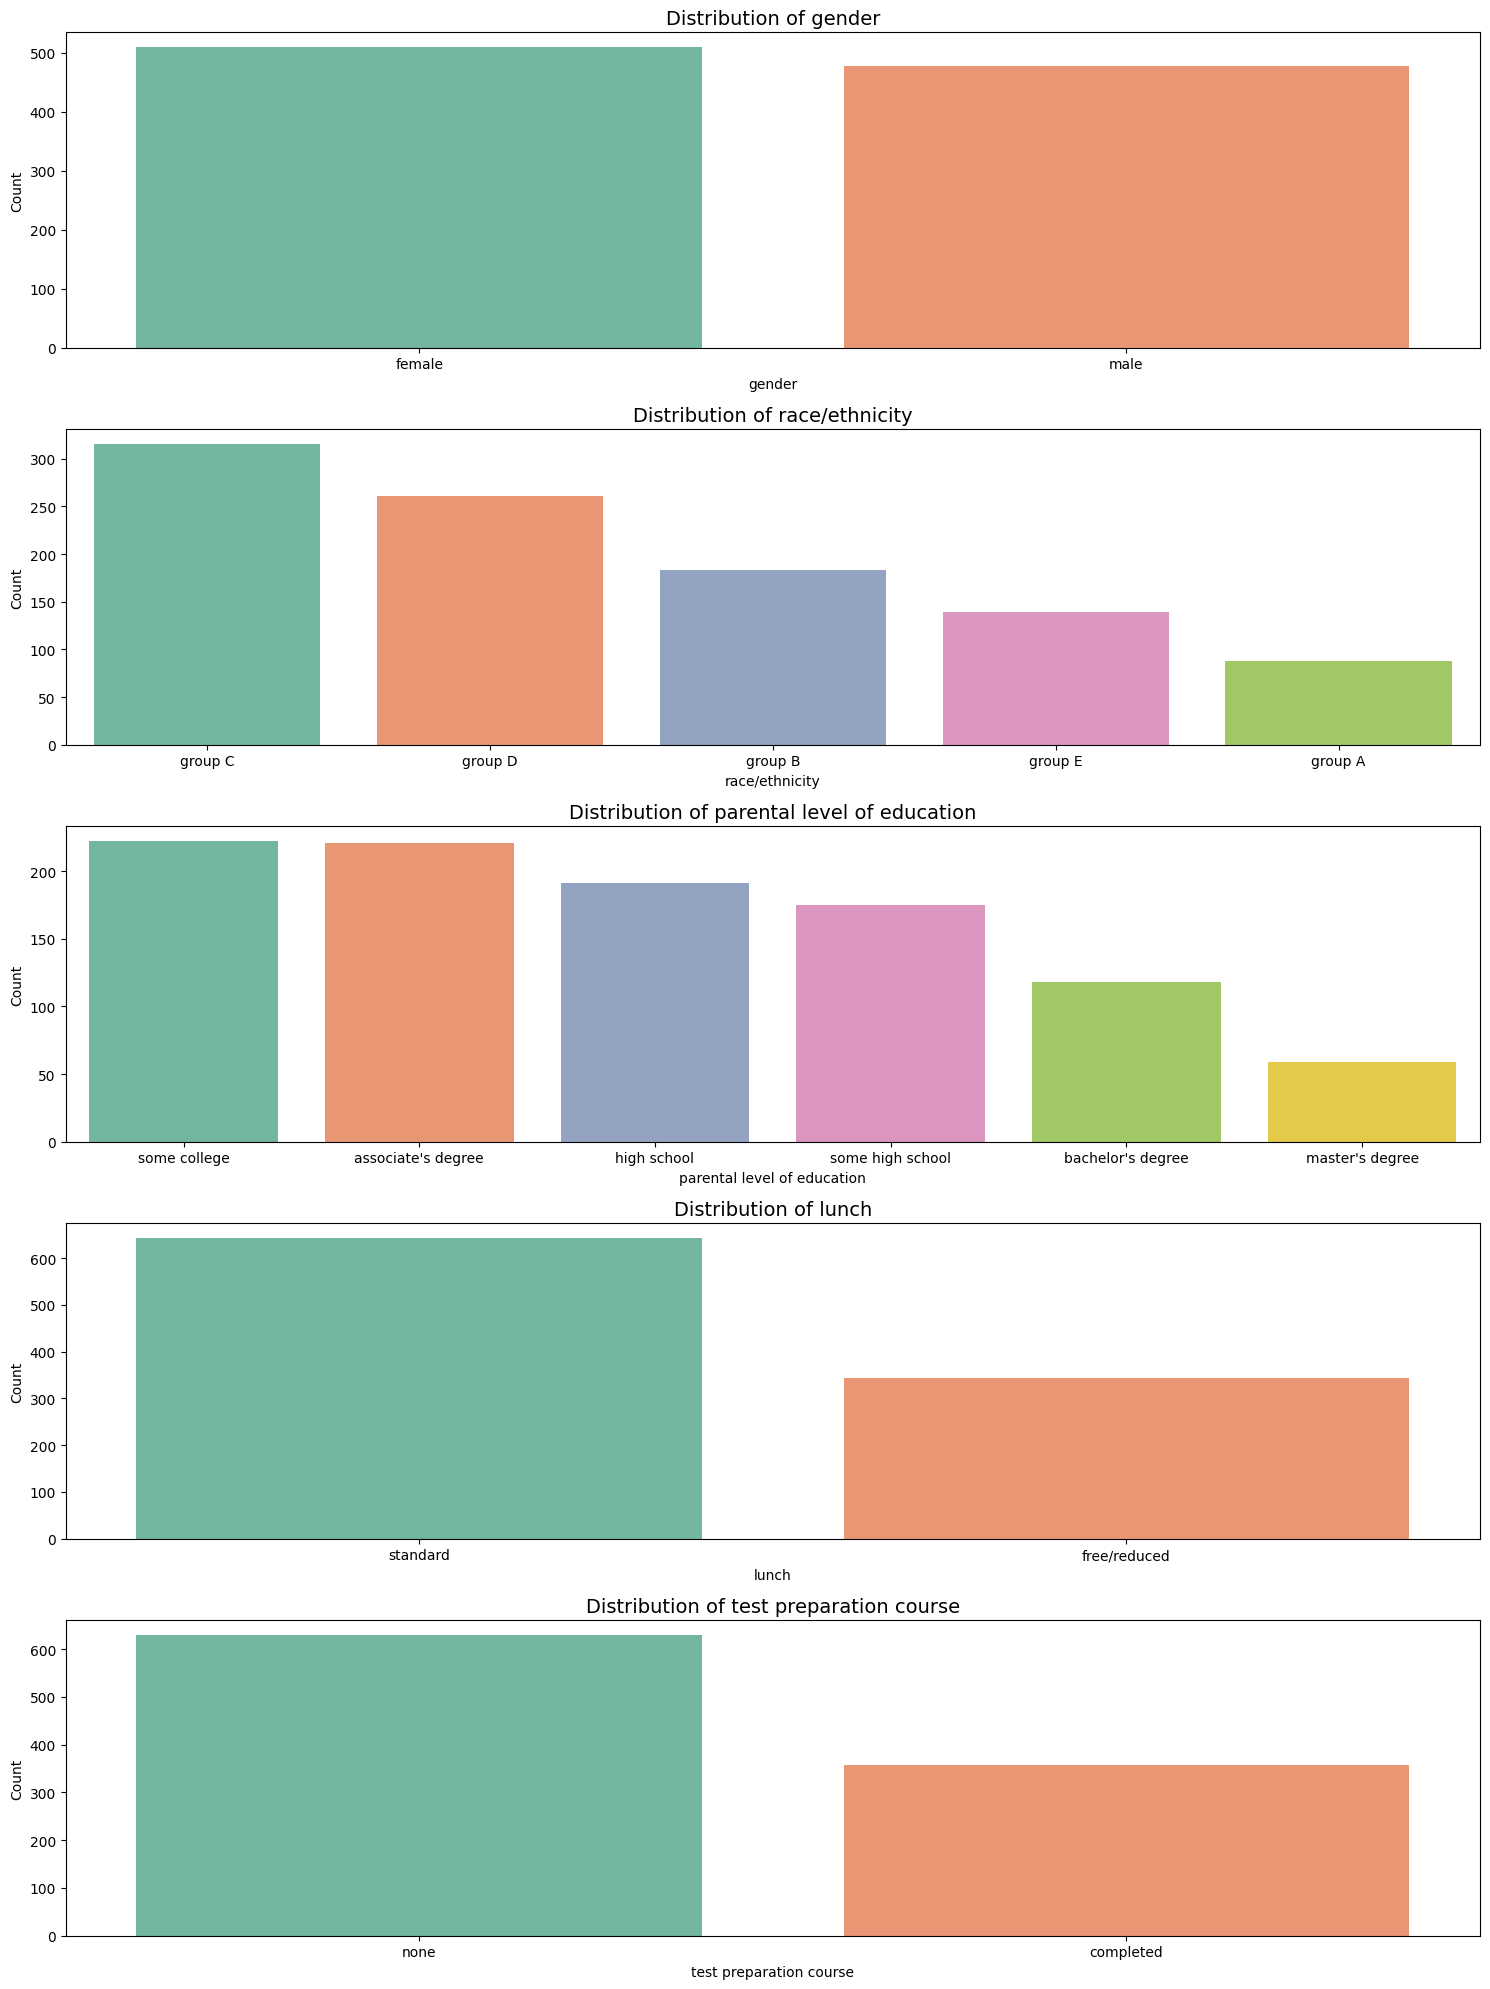

'These bar charts provide a visual summary of all the categorical columns,\nmaking it easier to understand the data. Each plot displays the count of values\nin its category, highlighting which values are most frequent.'

In [49]:
plt.figure(figsize=(15, 20))  # Adjust the overall figure size

for i, col in enumerate(cat):
    plt.subplot(len(cat), 1, i + 1)
    sns.countplot(data=X, x=col, order=X[col].value_counts().index, palette="Set2")
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xticks(rotation=360)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

'''These bar charts provide a visual summary of all the categorical columns,
making it easier to understand the data. Each plot displays the count of values
in its category, highlighting which values are most frequent.'''

In [50]:
print(X["gender"].value_counts())
print(X["race/ethnicity"].value_counts())
print(X["parental level of education"].value_counts())
print(X["lunch"].value_counts())
print(X["test preparation course"].value_counts()) # This is table format of above visual.

gender
female    509
male      477
Name: count, dtype: int64
race/ethnicity
group C    315
group D    261
group B    183
group E    139
group A     88
Name: count, dtype: int64
parental level of education
some college          222
associate's degree    221
high school           191
some high school      175
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch
standard        642
free/reduced    344
Name: count, dtype: int64
test preparation course
none         629
completed    357
Name: count, dtype: int64


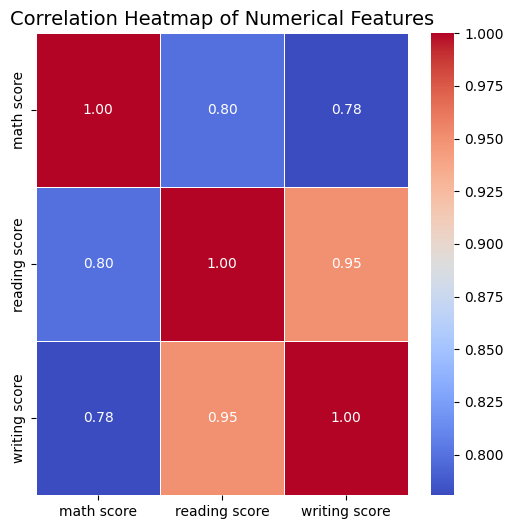

In [51]:
corr = X.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show() #In this we can see there is correlation between the 3 columns.

In [52]:
from sklearn.compose import ColumnTransformer #This can transform any column to be selected for the pipeline to initiate the process.
from sklearn.pipeline import Pipeline #To call the pipeline using the
from sklearn.preprocessing import OneHotEncoder, StandardScaler #These are encoding modules used for encoding purpose.


Spliting the dataset into training and testing into 80:20 ratio.

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
encoder = ColumnTransformer(transformers=[
    ("num_encode",StandardScaler(),num),("cat_encode",OneHotEncoder(drop="first"),cat)])

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Creating pipelines and fitting model for dataset to train.

In [56]:
pipe_log = Pipeline(steps=[('preprocessor', encoder),
                           ('classifier', LogisticRegression(max_iter=1000))])

pipe_rf = Pipeline(steps=[('preprocessor', encoder),
                          ('classifier', RandomForestClassifier())])

In [57]:
pipe_log.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_encode',
                                                  StandardScaler(),
                                                  Index(['math score', 'reading score', 'writing score'], dtype='object')),
                                                 ('cat_encode',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [58]:
#Predict the test dataset.
logistics_pred = pipe_log.predict(X_test)
rf_pred = pipe_rf.predict(X_test)

In [59]:
# Print classification reports
print("Logistic Regression Report:\n")
print(classification_report(y_test, logistics_pred))

print("Random Forest Report:\n")
print(classification_report(y_test, rf_pred))

Logistic Regression Report:

              precision    recall  f1-score   support

        fail       1.00      0.88      0.94        17
        pass       0.99      1.00      0.99       181

    accuracy                           0.99       198
   macro avg       0.99      0.94      0.97       198
weighted avg       0.99      0.99      0.99       198

Random Forest Report:

              precision    recall  f1-score   support

        fail       1.00      0.82      0.90        17
        pass       0.98      1.00      0.99       181

    accuracy                           0.98       198
   macro avg       0.99      0.91      0.95       198
weighted avg       0.99      0.98      0.98       198



In [60]:
log_report = classification_report(y_test, logistics_pred, output_dict=True)
rf_report = classification_report(y_test, rf_pred, output_dict=True)

In [61]:
print("Random Forest Accuracy:", round(rf_report["accuracy"], 3))
print("Random Forest F1-Score (pass):", round(rf_report["pass"]["f1-score"], 3))

print("Logistic Regression Accuracy:", round(log_report["accuracy"], 3))
print("Logistic Regression F1-Score (pass):", round(log_report["pass"]["f1-score"], 3))

Random Forest Accuracy: 0.985
Random Forest F1-Score (pass): 0.992
Logistic Regression Accuracy: 0.99
Logistic Regression F1-Score (pass): 0.995


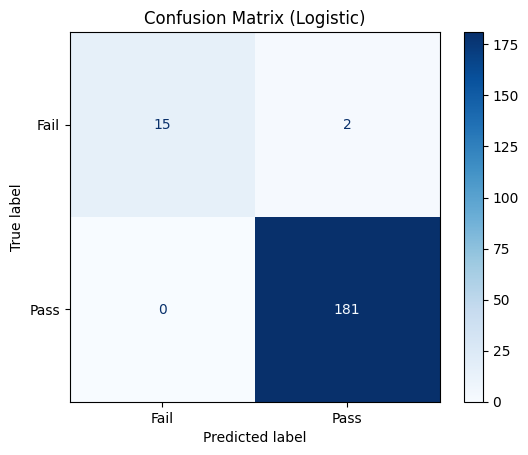

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, logistics_pred)

#plot confusin matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Logistic)")
plt.show()

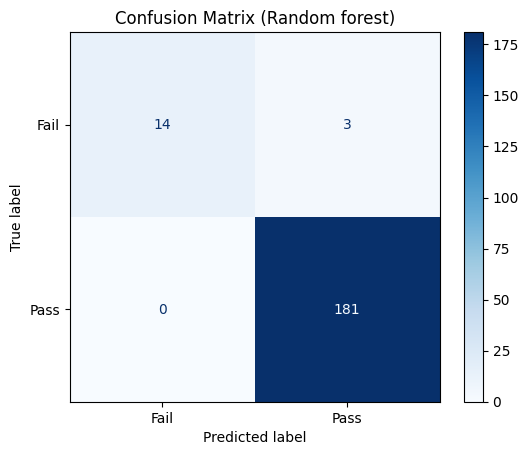

In [63]:
cm = confusion_matrix(y_test, rf_pred)

#plot confusin matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Random forest)")
plt.show()

Conclusion:
The logistic is performing better compared with random forest interms of accuracy and confusion matrix.